In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw3.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://github.com/UBC-CS/cpsc330-2023W1/tree/main/lectures) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Imports 

In [2]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Submission instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.



_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

## Introduction <a name="in"></a>
<hr>

A crucial step when using machine learning algorithms on real-world datasets is preprocessing. This homework will give you some practice of data preprocessing and building a supervised machine learning pipeline on a real-world dataset. 

<br><br>

## Exercise 1: Introducing the dataset
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` under the data folder in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` under the data folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [3]:
census_df = pd.read_csv("data/adult.csv")
census_df.shape
census_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

<br><br>

### 1.1 Data splitting 
rubric={autograde:2}

To prevent any violation of the golden rule, the initial step before proceeding with any task is to split the data.

**Your tasks:**

1. Split the data into `train_df` (40%) and `test_df` (60%) with `random_state = 123`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.  

_Usually having more data for training is a good idea. But here I'm using 40%/60% split because running cross-validation with this dataset can take a while on a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the model performance!_

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(census_df, train_size=0.40, random_state= 123)

In [5]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

## Exercise 2: Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

Let's examine our `train_df`. 

In [6]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values because they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [7]:
train_df = train_df.replace("?", np.nan)
test_df = test_df.replace("?", np.nan)
train_df.shape

(13024, 15)

In [8]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 2.1 `describe()` method
rubric={autograde:5}

**Your tasks:**

1. Examine the output of `train_df.describe()` with `include='all'` argument and store it in a variable called `census_summary`.
2. What is the highest hours per week someone reported? Store it in a variable called `max_hours_per_week`.
3. What is the most frequently occurring occupation in this dataset? Store it in a variable called `most_freq_occupation`.
4. Store the column names of the columns with missing values as a list in a variable called `missing_vals_cols`. 
5. Store the column names of all numeric-looking columns as a list in a variable called `numeric_cols`.  

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 5

In [9]:
census_summary = train_df.describe(include="all")
census_summary

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,13024.000000,12284,1.302400e+04,13024,13024.000000,13024,12281,13024,13024,13024,13024.000000,13024.000000,13024.000000,12783,13024
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,9123,NaN,4153,NaN,5936,1649,5195,11158,8700,NaN,NaN,NaN,11717,9875
mean,38.546913,NaN,1.884759e+05,NaN,10.057432,NaN,NaN,NaN,NaN,NaN,1079.831695,86.543074,40.395654,NaN,NaN
std,13.610225,NaN,1.040895e+05,NaN,2.553084,NaN,NaN,NaN,NaN,NaN,7322.034546,403.025863,12.285347,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.170962e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778990e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.365655e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
max_hours_per_week =  census_summary.loc["max", "hours.per.week"]

In [11]:
type(max_hours_per_week)

numpy.float64

In [12]:
most_freq_occupation = census_summary.loc["top", "occupation"]
print(most_freq_occupation)

Prof-specialty


In [13]:
census_summary.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education.num     float64
marital.status     object
occupation         object
relationship       object
race               object
sex                object
capital.gain      float64
capital.loss      float64
hours.per.week    float64
native.country     object
income             object
dtype: object

In [14]:
missing_vals_cols = train_df.columns[train_df.isnull().any()].tolist()
numeric_cols = train_df.select_dtypes(exclude=['object']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

In [15]:
# Sorting the lists for the autograder
missing_vals_cols.sort()
numeric_cols.sort()

In [16]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.2 Visualizing features
rubric={points:5}

**Your tasks:**

1. For each numeric feature in `numeric_cols` you identified above, visualize the histograms for <=50K and >50K classes. 
2. Write a sentence or two describing your observations. 

> You can use the library of your choice for visualization. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 5

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'capital.gain'}>],
       [<Axes: title={'center': 'capital.loss'}>,
        <Axes: title={'center': 'education.num'}>],
       [<Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'hours.per.week'}>]], dtype=object)

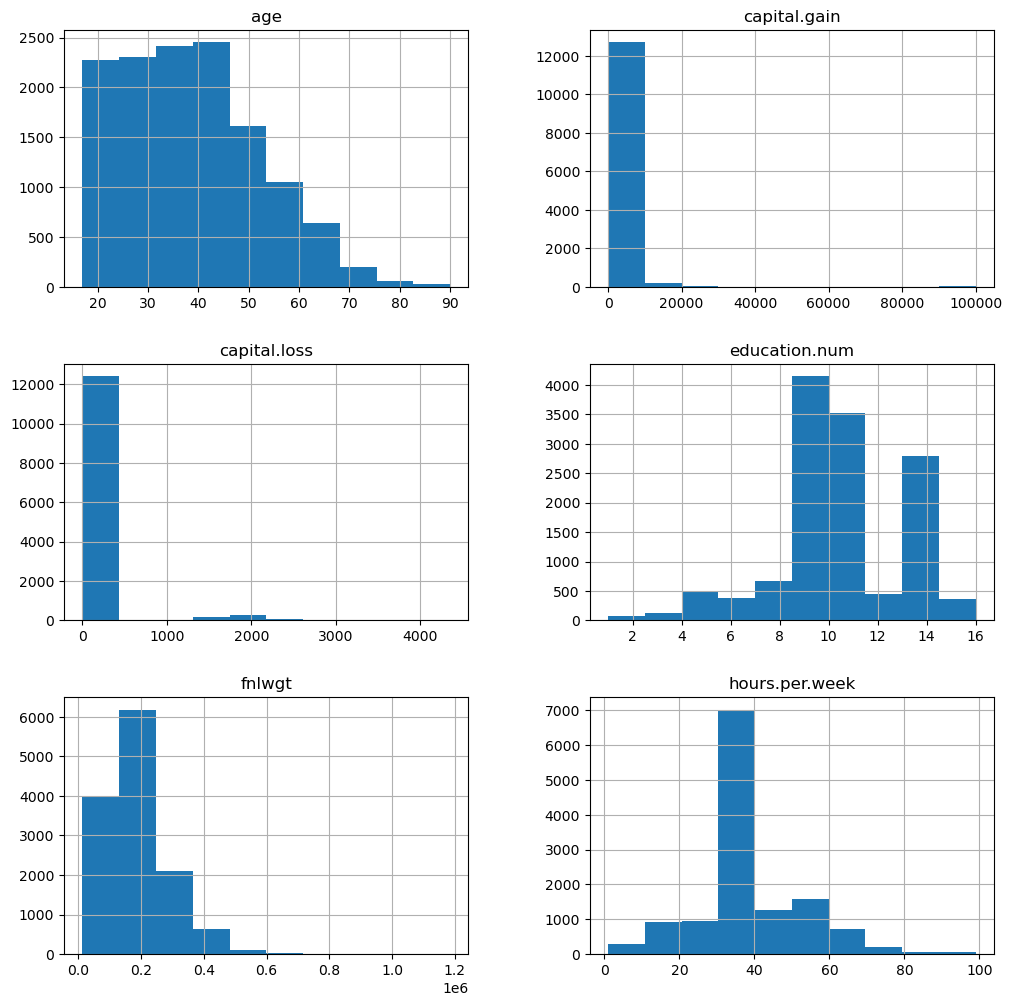

In [17]:
train_df.hist(numeric_cols, figsize=(12, 12))


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Identify transformations to apply
rubric={points:13}

Before passing this data to a machine learning model, we need to apply some transformations on different features. Below we are providing possible transformations which can be applied on each column in `census_df`.  

**Your tasks:**
1. Write your justification or explanation for each row in the explanation column. An example explanation is given for the age column. 

> Note: This question is a bit open-ended. If you do not agree with the provided transformation, feel free to argue your case in the explanation. That said, in this assignment, go with the transformations provided below. 

<div class="alert alert-warning">

Solution_2.3
    
</div>

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| age | scaling |  A numeric feature with no missing values. It will be a good idea to apply scaling, as the range of values (17 to 90) is quite different compared to other numeric features.|
| workclass | imputation, one-hot encoding | A categorical feature with missing values. It would necessary to apply one-hot-encoding to convert each category to numeric values before passed into a machine learning model. | 
| fnlwgt | drop | The fnlwgt attribute is calculated by Census Bureau and varies by states. It has no contributions to the target income |
| education | ordinal encoding | A categorical feature with no missing values. It can be converted to numeric variables in order because education has a commonly acknowledged ordering |
| education.num | drop | A numerical feature without missing values. It is better to be dropped because the level of education may have higher impact on incoming than the years. |
| marital.status | one-hot encoding  | A categorical feature with no missing values. It is suitable to apply one-hot encoding because the values have no ordinal relationships between each other|
| occupation | imputation, one-hot encoding  | A categorical feature with no missing values. It should also apply one-hot encoding as occupation values have no ordinal relationships.  |
| relationship | one-hot encoding  |A categorical feature with no missing values. It should also apply one-hot encoding as the values have no ordinal relationships. |
| race | drop  | A categorical feature with no missing values. Race is not related to the target technically. |
| sex | one-hot encoding with "binary=True" | A categorical feature with no missing values. The values in the dataset presents a binary pattern. |
| capital.gain | scaling | A numeric feature with no missing values. It will be a good idea to apply scaling, as the range of values (0 to 99999) is quite different compared to other numeric features. | 
| capital.loss | scaling | A numeric feature with no missing values. It will be a good idea to apply scaling, as the range of values (0 to 4356) is quite different compared to other numeric features. |
| hours.per.week | scaling | A numeric feature with no missing values. It will be a good idea to apply scaling, as the range of values (1 to 99) is quite different compared to other numeric features. |
| native.country | imputation, one-hot encoding | A categorical feature with missing values. It will be a good idea to apply one-hot encoding because no two values have ordinal relationships| 


_Points:_ 13

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

### 2.4 Identify feature types 
rubric={autograde:5}


**Your tasks:**
1. Based on the types of transformations you want to apply on the features, identify different feature types and store them in the variables below as lists.  

<div class="alert alert-warning">
    
Solution_2.4
    
</div>

_Points:_ 5

In [18]:
categorical_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [19]:
# Fill in the lists below.
numeric_features = ['age', 'capital.gain', 'capital.loss','hours.per.week']
categorical_features = ['workclass', 'relationship', 'marital.status', "occupation", 'native.country']
ordinal_features = ['education']
binary_features = ['sex']
drop_features = ['fnlwgt', 'education.num', 'race']
target = 'income'

In [20]:
# Sorting all the lists above for the autograder
numeric_features.sort()
categorical_features.sort()
ordinal_features.sort()
binary_features.sort()
drop_features.sort()

In [21]:
grader.check("q2.4")

q2.4 results: All test cases passed!

In [22]:
train_df.shape

(13024, 15)

<br><br><br><br>

## Exercise 3: Baseline models 

### 3.1 Separating feature vectors and targets  
rubric={autograde:2}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df` and `test_df`. 

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

_Points:_ 2

In [23]:

X_train = train_df.drop(columns=target, inplace = False)
y_train = train_df[target]

X_test = test_df.drop(columns=target, inplace = False)
y_test = test_df[target]

In [24]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

### 3.2 Dummy classifier
rubric={autograde:2}

**Your tasks:**

1. Carry out 5-fold cross-validation using `DummyClassifier` with `strategy="most_frequent"` and `scikit-learn`'s `cross_validate` function with `return_train_scores=True` 
2. Store the results as a dataframe named `dummy_df` where each row corresponds to the results from a cross-validation fold. 

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

_Points:_ 2

In [25]:

dummy_clf = DummyClassifier(strategy="most_frequent", random_state=123)
dummy_df = pd.DataFrame(cross_validate(dummy_clf, X_train, y_train, cv=5, return_train_score=True))
dummy_df

,fit_time,score_time,test_score,train_score
0,0.003113,0.002742,0.758157,0.758230
1,0.003192,0.002604,0.758157,0.758230
2,0.003093,0.002659,0.758157,0.758230
3,0.003102,0.002752,0.758157,0.758230
4,0.003062,0.002976,0.758449,0.758157


In [26]:
grader.check("q3.2")

q3.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Discussion
rubric={points:2}

**Your tasks:**

1. Hopefully, you were able to run cross-validation with dummy classifier successfully in the question above. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not? 

<div class="alert alert-warning">
    
Solution_3.3
    
</div>

_Points:_ 2

It wouldn't work, because there are categorical values and missing values in the X_train df. The SVC model can only be trained on the numeric values.
Besides, each columns of numeric values in the X_train df is of different scale, columns/features with large values will have more significant impacts in training the model, and features with smaller values will be ignored. This would result an accurate and reliable model.

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 4: Column Transformer
<hr>

In this dataset, we have different types of features: numeric features, an ordinal feature, categorical features, and a binary feature. We want to apply different transformations on different columns and therefore we need a column transformer. In this exercise, first, we'll define different transformations on different types of features and then will create a `scikit-learn`'s `ColumnTransformer`. For example, the code below creates a `numeric_transformer` for numeric features. 

In [27]:
numeric_transformer = StandardScaler()

In the exercises below, you'll create transformers for other types of features. 

<br><br>

### 4.1 Preprocessing ordinal features
rubric={autograde:5}

**Your tasks:**

1. Create a transformer called `ordinal_transformer` for our ordinal features. 

> Ordering of some of the education levels is not obvious. Assume that "HS-grad" < "Prof-school" < "Assoc-voc" < "Assoc-acdm" < "Some-college" < "Bachelors"

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

_Points:_ 5

In [28]:
from sklearn.preprocessing import OrdinalEncoder
education_ordinal= ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Prof-school", "Assoc-voc","Assoc-acdm", "Some-college", "Bachelors", "Masters", "Doctorate"]
print(set(education_ordinal)==set(train_df["education"].unique()))
ordinal_transformer = OrdinalEncoder(categories=[education_ordinal], dtype=int)
ordinal_transformer


True


OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th',
                            '10th', '11th', '12th', 'HS-grad', 'Prof-school',
                            'Assoc-voc', 'Assoc-acdm', 'Some-college',
                            'Bachelors', 'Masters', 'Doctorate']],
               dtype=<class 'int'>)

In [29]:
train_df["education"].unique()

array(['Bachelors', 'Some-college', '11th', 'HS-grad', 'Assoc-acdm',
       '9th', 'Masters', 'Doctorate', '1st-4th', '7th-8th', 'Assoc-voc',
       '10th', '5th-6th', 'Preschool', 'Prof-school', '12th'],
      dtype=object)

In [30]:
grader.check("q4.1")

q4.1 results: All test cases passed!

<br><br>

### 4.2 Preprocessing binary features
rubric={autograde:2}

**Your tasks:**

1. Create a transformer called `binary_transformer` for our binary features. 

> _Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

_Points:_ 2

In [31]:
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)

In [32]:
grader.check("q4.2")

q4.2 results: All test cases passed!

<br><br>

### 4.3 Preprocessing categorical features
rubric={autograde:4}

In Exercises 2.1 and 2.3, we saw that there are 3 categorical features with missing values. So first we need to impute the missing values and then encode these features with one-hot encoding. For the purpose of this assignment, let's just have imputation as the first step for all categorical features even when they do not have missing values. This should be OK because if a feature doesn't have any missing value,  imputation won't be applied. 

If we want to apply more than one transformation on a set of features, we need to create a [`scikit-learn` `Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). For example, for categorical features we can create a `scikit-learn` `Pipeline` with first step as imputation and the second step as one-hot encoding. 

**Your tasks:**

1. Create a `sklearn` `Pipeline` using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) called `categorical_transformer` for our categorical features with two steps: `SimpleImputer` for imputation with `strategy="constant"` and `fill_value="missing"` and `OneHotEncoder` with `handle_unknown="ignore"` for one-hot encoding. 

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

_Points:_ 4

In [33]:
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"), 
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    )

In [34]:
grader.check("q4.3")

q4.3 results: All test cases passed!

<br><br>

### 4.4 Creating a column transformer. 
rubric={autograde:7}

**Your tasks:**
1. Create a `sklearn` `ColumnTransformer` named `preprocessor` using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) with the transformers defined in the previous exercises. Use the sequence below in the column transformer and add a "drop" step for the `drop_features` in the end.  
    - `numeric_transformer`
    - `ordinal_transformer`
    - `binary_transformer`
    - `categorical_transformer`
2. Transform the data by calling `fit_transform` on the training set and save it as a dataframe in a variable called `transformed_df`. How many new columns have been created in the preprocessed data in comparison to the original `X_train`? Store the difference between the number of columns in `transformed_df` and `X_train` in a variable called `n_new_cols`.

> You are not required to do this but optionally you can try to get column names of the transformed data and create the dataframe `transformed_df` with proper column names. 

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

_Points:_ 7

In [35]:
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)
transformed_df = pd.DataFrame(preprocessor.fit_transform(X_train))

In [36]:
n_new_cols =len(transformed_df.columns) - len(X_train.columns) 


In [37]:
grader.check("q4.4")

q4.4 results: All test cases passed!

<br><br><br><br>

## Exercise 5: Building models 

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Use it to keep track of your results. 

In [38]:
results_dict = {}  # dictionary to store all the results

In [39]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Below I'm showing an example where I call `mean_std_cross_val_scores` with `DummyClassifier`. The function calls `cross_validate` with the passed arguments and returns a series with mean cross-validation results and std of cross-validation. When you train new models, you can just add the results of these models in `results_dict`, which can be easily converted to a dataframe so that you can have a table with all your results. 

In [40]:
# Baseline model

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.019 (+/- 0.002),0.007 (+/- 0.000),0.758 (+/- 0.000),0.758 (+/- 0.000)


<br><br>

### 5.1 Trying different classifiers
rubric={autograde:10}

**Your tasks:**

1. For each of the models in the starter code below: 
    - Define a pipeline with two steps: `preprocessor` from 4.4 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline and get the mean cross-validation scores with std by calling the `mean_std_cross_val_scores` function above. 
    - Store the results in a dataframe called `income_pred_results_df` with the model names in the `models` dictionary below as the index and each row representing results returned by `mean_std_cross_val_scores` function above. In other words, `income_pred_results_df` should look similar to the `results_df` dataframe above with more rows for the models below. 
    
> This might take a while to run. Be patient! 

In [41]:
models = {
    "decision tree": DecisionTreeClassifier(random_state=123),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
}

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

_Points:_ 10

In [42]:
from sklearn.pipeline import Pipeline, make_pipeline
income_pred_results_dict = {}
for model in models:
    pipe_new = make_pipeline(preprocessor, models.get(model))
    income_pred_results_dict[model] = mean_std_cross_val_scores(pipe_new, X_train, y_train, cv=5, return_train_score=True)

income_pred_results_df = pd.DataFrame(income_pred_results_dict).T



In [43]:
income_pred_results_df

,fit_time,score_time,test_score,train_score
decision tree,0.059 (+/- 0.001),0.008 (+/- 0.001),0.813 (+/- 0.011),0.987 (+/- 0.001)
kNN,0.021 (+/- 0.002),0.059 (+/- 0.012),0.836 (+/- 0.008),0.884 (+/- 0.003)
RBF SVM,1.747 (+/- 0.028),0.936 (+/- 0.020),0.852 (+/- 0.005),0.855 (+/- 0.002)


In [44]:
grader.check("q5.1")

q5.1 results:
    q5.1 - 1 result:
        ✅ Test case passed

    q5.1 - 2 result:
        ✅ Test case passed

    q5.1 - 3 result:
        ❌ Test case failed
        Trying:
            assert not isinstance(income_pred_results_df.at['decision tree', 'test_score'], np.ndarray), "Your results format seems wrong. Did you use `mean_std_cross_val_scores` for cross validation?"
        Expecting nothing
        ok
        Trying:
            assert income_pred_results_df.at['decision tree', 'test_score'] == "0.814 (+/- 0.012)", "Your decision tree `test_score` seems wrong. Did you use `mean_std_cross_val_scores` for cross validation?"
        Expecting nothing
        **********************************************************************
        Line 2, in q5.1 2
        Failed example:
            assert income_pred_results_df.at['decision tree', 'test_score'] == "0.814 (+/- 0.012)", "Your decision tree `test_score` seems wrong. Did you use `mean_std_cross_val_scores` for cross validation?"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/celine/anaconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q5.1 2[1]>", line 1, in <module>
                assert income_pred_results_df.at['decision tree', 'test_score'] == "0.814 (+/- 0.012)", "Your decision tree `test_score` seems wrong. Did you use `mean_std_cross_val_scores` for cross validation?"
            AssertionError: Your decision tree `test_score` seems wrong. Did you use `mean_std_cross_val_scores` for cross validation?
        Trying:
            assert income_pred_results_df.at['RBF SVM', 'train_score'] == "0.855 (+/- 0.002)", "Your RBF SVM `train_score` seems wrong. Did you use `mean_std_cross_val_scores` for cross validation?"
        Expecting nothing
        ok

<br><br>

<!-- BEGIN QUESTION -->

### 5.2 Discussion 
rubric={points:5}

**Your tasks:**

Examine the train and validation accuracies and `fit` and `score` times for all the models in the results above and answer the questions below: 
1. Among the models, which one achieves the highest validation accuracy?
2. Excluding the dummy model, which model exhibits the shortest 'fit' time? Similarly, which model boasts the quickest 'score' time?
3. Among the models, which one shows the highest degree of overfitting and which one exhibits the least overfitting?

<div class="alert alert-warning">
    
Solution_5.2
    
</div>

_Points:_ 5

1. RBF SVM
2. KNN
3. Decision tree has the highest degree of overfitting, and RBF SVM exhibits the least overfitting

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 5.3 Hyperparameter optimization
rubric={points:10}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of `SVC RBF` classifier. In practice, you'll carry out hyperparameter optimization for all different hyperparameters of the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter, namely `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` below: 
    - Create a pipeline object with two steps: preprocessor from 4.4 and `SVC` classifier with the `C` value.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. 
2. Which hyperparameter value seems to be performing the best? Store it in a variable called `best_C`. (Since this question is not autograded, please store the value directly as a number, something like `best_C = 0.001`, if `C = 0.001` is giving you the best CV score.) Is it different than the default value for the hyperparameter used by `scikit-learn`? 

> Note: Running this will take a while. Please be patient. 

In [45]:
param_grid = {"C": np.logspace(-1, 2, 4)}
param_grid
results_dict = {}
for param in param_grid.get("C"):
    pipe = make_pipeline(preprocessor, SVC(C=param))
    results_dict[param] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5)
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score
0.1,2.044 (+/- 0.045),1.088 (+/- 0.022),0.838 (+/- 0.006)
1.0,1.741 (+/- 0.026),0.937 (+/- 0.027),0.852 (+/- 0.005)
10.0,1.718 (+/- 0.033),0.866 (+/- 0.043),0.858 (+/- 0.005)
100.0,2.231 (+/- 0.029),0.851 (+/- 0.047),0.860 (+/- 0.006)


<div class="alert alert-warning">
    
Solution_5.3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
best_C = 100

...

Ellipsis

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 6: Evaluating on the test set 
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise, you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 6.1 Scoring on the unseen test set 
rubric={autograde:4}

**Your tasks:**

1. Create a pipeline named `final_pipeline` with the preprocessor from 4.4 as the first step and the best performing SVC model from 5.3 as the second step (i.e. `C=best_C`). 
2. Train `final_pipeline` on the entire training set `X_train` and `y_train`. 
3. Score `final_pipeline` on `X_test` and `y_test` and store the score in a variable called `test_score`.  

<div class="alert alert-warning">
    
Solution_6.1
    
</div>

_Points:_ 4

_Type your answer here, replacing this text._

In [49]:
final_pipeline = make_pipeline(preprocessor, SVC(C=best_C))
final_pipeline.fit(X_train, y_train)
test_score = final_pipeline.score(X_test, y_test)

...

Ellipsis

In [50]:
grader.check("q6.1")

q6.1 results: All test cases passed!

<br><br><br><br>

## Exercise 7: Short answer questions

<!-- BEGIN QUESTION -->

### 7.1 kNNs toy example
rubric={points:3}

Suppose you want to get predictions using the $k$-nearest neighbour algorithm on the toy dataset below. 

$$ X = \begin{bmatrix}5 & 2\\4 & -2\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}0\\0\\1\\1\\1\\2\end{bmatrix}.$$

Suppose you are given a new data point $x=\begin{bmatrix} 0 & 0\end{bmatrix}$.  

1. What would the model predict when $k=1$?
2. What would the model predict when $k=3$?
3. What would the model predict when $k=3$ if we were doing regression rather than classification? 

<div class="alert alert-warning">
    
Solution_7.1
    
</div>

_Points:_ 3

1. 1
2. 0
3. It depends. If assigning weight points by the inverse of their distance, the closest neighbor X = (2, 2) will have a greater query point than X = (5, 2) and X = (4, -2), therefore the model may predict 1. If using uniform weight, the model would produce 0, 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 7.2 Preprocessing
rubric={points:8}

1. What is the problem with calling `fit_transform` on your test data with `StandardScaler`?
2. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?
3. What are two advantages of using sklearn Pipelines? 
4. When is it appropriate to use sklearn `ColumnTransformer`? 

<div class="alert alert-warning">
    
Solution_7.2
    
</div>

_Points:_ 8

1. It violates the golden rule. It uses the mean and standard deviation from the test data, which is different from the scalar of the training data. The test data and train data should be scaled based on the same scaler before training the model. 
2. It is very important to follow the golden rule to avoid data leakage. If violated, it lead to overfiiting problem, meaning that and the training core of the classifier is very high but the model can not generalize well to new dataset. 
3. Using pipelines avoids introducing test data to the training phrase; It also introduces streamlined workflow and simpliles the code and thus is less likely to introduce human errors, which is more readable and easier to maintain. 
4. When the columns of a dataset are of various data types and needs to apply different transformers before fitting into the model. Using column transformer will combine several transformations into a single transformer..

<!-- END QUESTION -->

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 



Congratulations on finishing the homework! This was a tricky one but I hope you are feeling good after working on it. You are now ready to build a simple supervised machine learning pipeline on real-world datasets! Well done :clap:! 

![](img/eva-well-done.png)

